#Objective- To To help investor manage their portfolio by visualizing dataset, drawing insight such as dail such as daily stock return and risk.

In [3]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

###Importing the Library

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

#### Read the stock data csv file, here's the list of the stocks considered:

#### AAPL = Apple Stock 
#### BA = Boeing 
#### T = AT&T
#### MGM = MGM Resorts International (Hotel Industry)
#### AMZN = Amazon
#### IBM = IBM
#### TSLA = Tesla Motors
#### GOOG = Google 
#### sp500 = US Stock Market (S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on U.S. stock exchange)
#### Check the list of S&P 500 companies here: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies


In [5]:
stock_data=pd.read_csv('/content/drive/My Drive/Stock_Price_Analysis/stock.csv')
stock_data

Date        AAPL          BA  ...         TSLA         GOOG        sp500
0     2012-01-12   60.198570   75.510002  ...    28.250000   313.644379  1295.500000
1     2012-01-13   59.972858   74.599998  ...    22.790001   311.328064  1289.089966
2     2012-01-17   60.671429   75.239998  ...    26.600000   313.116364  1293.670044
3     2012-01-18   61.301430   75.059998  ...    26.809999   315.273285  1308.040039
4     2012-01-19   61.107143   75.559998  ...    26.760000   318.590851  1314.500000
...          ...         ...         ...  ...          ...          ...          ...
2154  2020-08-05  440.250000  174.279999  ...  1485.020020  1473.609985  3327.770020
2155  2020-08-06  455.609985  172.199997  ...  1489.579956  1500.099976  3349.159912
2156  2020-08-07  444.450012  170.020004  ...  1452.709961  1494.489990  3351.280029
2157  2020-08-10  450.910004  179.410004  ...  1418.569946  1496.099976  3360.469971
2158  2020-08-11  437.500000  180.130005  ...  1374.390015  1480.319946  3333.689941

[2159 rows x 10 columns]

In [7]:
# Sort the stock data by date
stock_data = stock_data.sort_values(by = ['Date'])
stock_data

Date        AAPL          BA  ...         TSLA         GOOG        sp500
0     2012-01-12   60.198570   75.510002  ...    28.250000   313.644379  1295.500000
1     2012-01-13   59.972858   74.599998  ...    22.790001   311.328064  1289.089966
2     2012-01-17   60.671429   75.239998  ...    26.600000   313.116364  1293.670044
3     2012-01-18   61.301430   75.059998  ...    26.809999   315.273285  1308.040039
4     2012-01-19   61.107143   75.559998  ...    26.760000   318.590851  1314.500000
...          ...         ...         ...  ...          ...          ...          ...
2154  2020-08-05  440.250000  174.279999  ...  1485.020020  1473.609985  3327.770020
2155  2020-08-06  455.609985  172.199997  ...  1489.579956  1500.099976  3349.159912
2156  2020-08-07  444.450012  170.020004  ...  1452.709961  1494.489990  3351.280029
2157  2020-08-10  450.910004  179.410004  ...  1418.569946  1496.099976  3360.469971
2158  2020-08-11  437.500000  180.130005  ...  1374.390015  1480.319946  3333.689941

[2159 rows x 10 columns]

In [8]:
# Print out the number of stocks
print('Total Number of stocks : {}'.format(len(stock_data.columns[1:])))

Total Number of stocks : 9


In [9]:
# Print the name of stocks
print('Stocks under consideration are:')

for i in stock_data.columns[1:]:
  print(i)

Stocks under consideration are:
AAPL
BA
T
MGM
AMZN
IBM
TSLA
GOOG
sp500


#####Performing Exploratory Data Analysis

In [16]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [24]:
# Get the mean values
stock_data.mean()

AAPL      140.819823
BA        189.942700
T          35.162899
MGM        23.105743
AMZN      915.665665
IBM       161.853001
TSLA      259.600815
GOOG      783.712512
sp500    2218.749554
dtype: float64

In [26]:
# Get the standard deviation of stocks (Volatility)
stock_data.std()

AAPL      70.827601
BA       103.678586
T          3.207490
MGM        6.963847
AMZN     697.838905
IBM       25.561938
TSLA     210.988003
GOOG     334.448057
sp500    537.321727
dtype: float64

In [18]:
#checking the statistic value of the stock
stock_data.describe()

AAPL           BA  ...         GOOG        sp500
count  2159.000000  2159.000000  ...  2159.000000  2159.000000
mean    140.819823   189.942700  ...   783.712512  2218.749554
std      70.827601   103.678586  ...   334.448057   537.321727
min      55.790001    67.239998  ...   278.481171  1278.040039
25%      89.165714   124.015000  ...   527.214416  1847.984985
50%     116.599998   142.419998  ...   737.599976  2106.629883
75%     175.019997   297.044998  ...  1079.744995  2705.810059
max     455.609985   440.619995  ...  1568.489990  3386.149902

[8 rows x 9 columns]

In [20]:
#Ckecking weather there is any null value present
stock_data.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [21]:
#Plotting the stock price 

def show_plot(df, fig_title):
  df.plot(x = 'Date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()

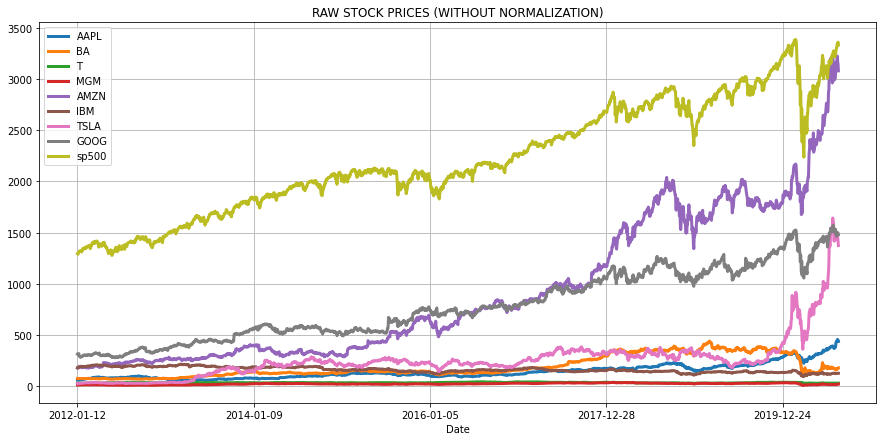

In [22]:
# Plot the data
show_plot(stock_data, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

In [27]:
# Function to normalize the prices based on the initial price
# The function simply divides every stock by it's price at the start date (i.e.: Date = 2012-01-12)	
def normalize(df):
  x = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

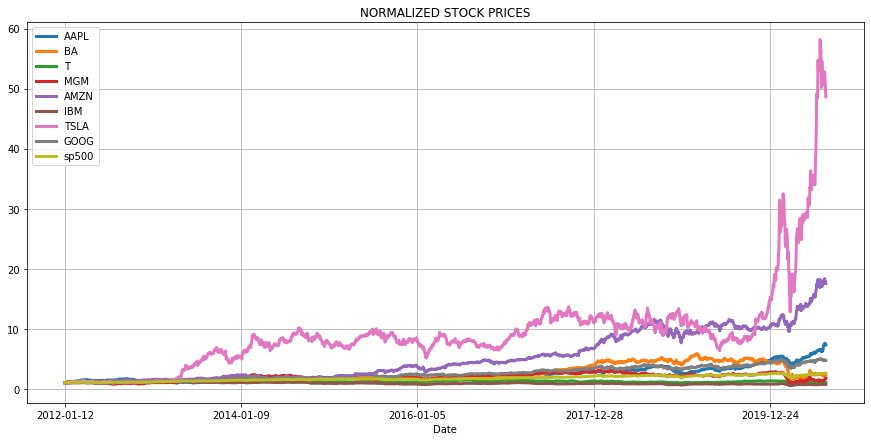

In [28]:
# Plot normalized data
# Notice the massive gains in Tesla Stock compared to Amazon (second place)
show_plot(normalize(stock_data), 'NORMALIZED STOCK PRICES')

In [30]:
# Function to perform an interactive data plotting using plotly express
# Plotly.express module which is imported as px includes functions that can plot interactive plots easily and effectively. 
# Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance. 

def interactive_plot(df, title):
  fig = px.line(title = title)
  
  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i) # add a new Scatter trace

  fig.show()

In [31]:
# Plot interactive chart
interactive_plot(stock_data, 'Prices')

In [33]:
# Plot normalized interactive chart
interactive_plot(normalize(stock_data), 'Normalized Prices')


In [35]:
# Plot normalized interactive chart
interactive_plot(normalize(stock_data), 'Normalized Prices')


####Trying to find Daily return of stocks

In [36]:
# Calculating daily return for a single security
# Let's take the S&P500 as an example first

df = stock_data['sp500']

# Define a dataframe names df_daily_return 
df_daily_return = df.copy()

#Loop through every element in the dataframe
for j in range(1, len(df)):

  # Calculate the percentage of change from the previous day
  df_daily_return[j] = ((df[j]- df[j-1])/df[j-1]) * 100

# put zero in the first line item
df_daily_return[0] = 0
df_daily_return

0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

In [39]:
df = stock_data['AMZN'] #Amazon Stock Return
df_daily_return = df.copy()
#Loop through every element in the dataframe
for j in range(1, len(df)):

  # Calculate the percentage of change from the previous day
  df_daily_return[j] = ((df[j]- df[j-1])/df[j-1]) * 100

# put zero in the first line item
df_daily_return[0] = 0
df_daily_return

0       0.000000
1       1.415339
2       1.815943
3       4.282725
4       2.644634
          ...   
2154    2.109065
2155    0.623082
2156   -1.784187
2157   -0.609323
2158   -2.143792
Name: AMZN, Length: 2159, dtype: float64

####Stocks Daily Return

In [40]:
# Let's define a function to calculate stocks daily returns (for all stocks) 
def daily_return(df):
  df_daily_return = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    
    # Loop through each row belonging to the stock
    for j in range(1, len(df)):

      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    # set the value of first row to zero since the previous value is not available
    df_daily_return[i][0] = 0
  
  return df_daily_return

In [43]:
# Get the daily returns 
stocks_daily_return = daily_return(stock_data)
stocks_daily_return

Date      AAPL        BA  ...       TSLA      GOOG     sp500
0     2012-01-12  0.000000  0.000000  ...   0.000000  0.000000  0.000000
1     2012-01-13 -0.374946 -1.205144  ... -19.327430 -0.738516 -0.494792
2     2012-01-17  1.164812  0.857909  ...  16.717854  0.574410  0.355295
3     2012-01-18  1.038382 -0.239234  ...   0.789470  0.688856  1.110793
4     2012-01-19 -0.316937  0.666134  ...  -0.186494  1.052283  0.493866
...          ...       ...       ...  ...        ...       ...       ...
2154  2020-08-05  0.362467  5.579446  ...  -0.133153  0.589774  0.642974
2155  2020-08-06  3.488923 -1.193483  ...   0.307062  1.797626  0.642770
2156  2020-08-07 -2.449458 -1.265966  ...  -2.475194 -0.373974  0.063303
2157  2020-08-10  1.453480  5.522880  ...  -2.350092  0.107728  0.274222
2158  2020-08-11 -2.973987  0.401316  ...  -3.114399 -1.054744 -0.796913

[2159 rows x 10 columns]

In [44]:
# Plot the interactive chart
# Zoom in to view the sharp decline during March 2020
interactive_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

In [45]:
# Daily Return Correlation
cm = stocks_daily_return.drop(columns = ['Date']).corr()

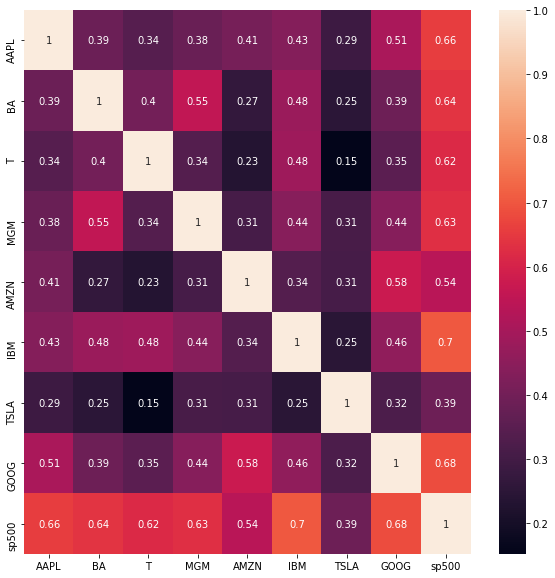

In [46]:
plt.figure(figsize=(10, 10))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax);

In [47]:
# Strong positive correlation between S&P500 and Google 
# Strong positive correlation between S&P500 and IBM
# Almost no correlation between Amazon and Beoing (totally different sectors)
# Some correlation exists between MGM and Boeing (Hotel and Airlines)

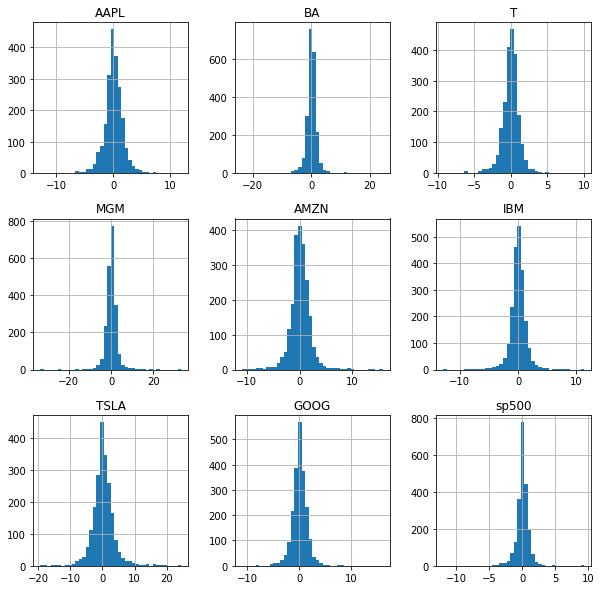

In [48]:
# Histogram of daily returns
stocks_daily_return.hist(figsize=(10, 10), bins = 40);

Tesla Standard deviation is high indicating a more volatile stock rest all Stock returns are normally distributed with zero mean 

In [50]:
# Group all data returns together in a list
# Make a copy of the daily returns dataframe
df_hist = stocks_daily_return.copy()

# Drop the date
df_hist = df_hist.drop(columns = ['Date'])

data = []

# Loop through every column
for i in df_hist.columns:
  data.append(stocks_daily_return[i].values)
data

[array([ 0.        , -0.37494578,  1.16481192, ..., -2.44945751,
         1.45347999, -2.9739868 ]),
 array([ 0.        , -1.20514366,  0.85790887, ..., -1.26596576,
         5.52287953,  0.40131597]),
 array([ 0.        , -0.16600597,  0.59860326, ...,  0.60321716,
         0.5996036 ,  0.        ]),
 array([ 0.        ,  1.81368508, -0.8097166 , ...,  3.08776831,
        13.76772918, -0.69284065]),
 array([ 0.        ,  1.41533854,  1.8159433 , ..., -1.78418726,
        -0.60932259, -2.14379167]),
 array([ 0.        , -0.76986928,  0.46885241, ..., -0.91976211,
         1.72055219, -0.28322004]),
 array([  0.        , -19.32743009,  16.71785359, ...,  -2.47519409,
         -2.35009162,  -3.1143992 ]),
 array([ 0.        , -0.73851634,  0.57441015, ..., -0.37397414,
         0.10772812, -1.05474435]),
 array([ 0.        , -0.49479228,  0.35529545, ...,  0.06330295,
         0.27422185, -0.79691324])]

In [51]:
fig = ff.create_distplot(data, df_hist.columns)
fig.show()